In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

from preprocessing.ohe import OneHotEncoder
from neighbors.knn_classifier import KNeighborsClassifier
# from linear_models.classification.logistic_regression import LogisticRegression
# from linear_models.regression.linear_regression import LinearRegression
# from linear_models.classification.least_squares_classifier import LeastSquareClassifier
# from classification.perceptron import Perceptron

In [10]:
X, y = make_blobs(random_state = 42)
y = y.reshape(-1,1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors = 2, distance_metric = 'Manhattan')
knn.fit(x_train, y_train)

In [13]:
yhat = knn.predict(x_test)

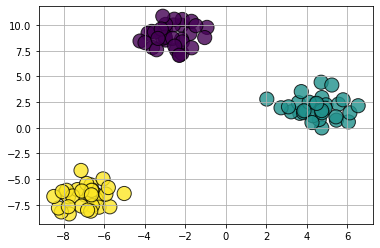

In [14]:
plt.grid(True)
plt.scatter(X[:,0], X[:,1], marker='o', c = y, 
            s = 200, edgecolor = 'k', alpha = 0.8)

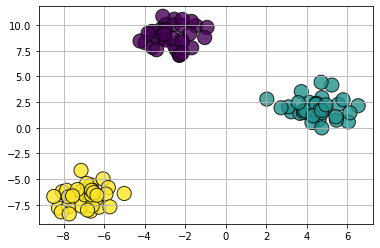

In [16]:
plt.grid(True)
plt.scatter(x_train[:,0], x_train[:,1], marker='o', c = y_train, 
            s = 200, edgecolor = 'k', alpha = 0.8)
plt.scatter(x_test[:,0], x_test[:,1], marker='o', c = yhat, 
            s = 200, edgecolor = 'k', alpha = 0.8)
plt.show()